<h1 align='center'> Análisis de sucursales de Starbucks💥 <h1>


# Introducción

En este estudio, exploramos la distribución geográfica de las sucursales de Starbucks a nivel mundial, centrándonos en el análisis detallado de dos países específicos: Argentina y España. Utilizando un conjunto de datos exhaustivo que incluye información sobre la ubicación de las tiendas, así como detalles como la marca, el número de tienda, la propiedad y la dirección, llevamos a cabo una investigación rigurosa para comprender mejor la presencia y la expansión de Starbucks en estos países.

Durante el proceso de análisis, nos encontramos con datos no uniformes y desorganizados, especialmente en lo que respecta a las ciudades donde se encuentran las sucursales. Para abordar esta cuestión, realizamos un proceso de limpieza de datos meticuloso, que incluyó la estandarización y la normalización de los nombres de las ciudades. Esto nos permitió organizar y clasificar adecuadamente las sucursales por ubicación geográfica y facilitar análisis comparativos y visualizaciones claras.

Este estudio proporciona una visión integral de la distribución de las sucursales de Starbucks a nivel mundial, con un enfoque específico en Argentina y España. A través del análisis detallado de los datos y la visualización de resultados, esperamos arrojar luz sobre la expansión y el impacto de Starbucks en estos mercados, así como identificar áreas de oportunidad y desarrollo para la empresa en el futuro.



# Librerias y Carga de Datos 📁

In [1]:
!pip install --quiet geocoder
print('pip installed geocoder')



pip installed geocoder


In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings(action='ignore', category=FutureWarning)

# Cargar el archivo CSV
df = pd.read_csv('directory.csv')

print(df.head())


       Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1 

# Análisis sobre Argentina

In [3]:

# Filtrar solo las filas correspondientes a Argentina
df_argentina = df[df['Country'] == 'AR']

# Imprimir el listado de locales en Argentina
print(df_argentina[['Store Name', 'City', 'Street Address', 'Longitude', 'Latitude']])


           Store Name          City                     Street Address  \
145   Alto Avelleneda    Avellaneda           Avenida Gral. Guemes 897   
146            Soleil      Boulogne                      Yrigiyen 2647   
147           Arevalo  Buenos Aires               Nicaragua 6045, CABA   
148  Terrazas de Mayo  Buenos Aires     Cruce Ruta 8 y 202, San Miguel   
149        San Isidro  Buenos Aires           Belgrano, 263 San Isidro   
..                ...           ...                                ...   
248           Estrada       Cordoba              Estrada 159 , Cordoba   
249            Canada       Cordoba                      Av. Colon 608   
250   Dinosaurio Mall       Cordoba  Av. Fuerza Aerea Argentina 1700 B   
251       Nuevocentro       Cordoba                 Duarte Quiroz 1400   
252  Cordoba Shopping       Cordoba              Jose de Goyechea 2851   

     Longitude  Latitude  
145     -58.37    -34.68  
146     -57.87    -34.88  
147     -58.44    -34.58  
148

In [4]:

# Filtrar solo las filas correspondientes a Argentina
df_argentina = df[df['Country'] == 'AR']

# Mostrar todas las variantes de "City" en Argentina
cities_in_argentina = df_argentina['City'].unique()
print("Variantes de 'City' en Argentina:")
for city in cities_in_argentina:
    print(city)

Variantes de 'City' en Argentina:
Avellaneda
Boulogne
Buenos Aires
Caba
Ezeiza
Martinez
Moron
Pilar
Quilmes
San Isidro
San Justo
Tigre
Tortuguitas
Vicente Lopez
Mendoza
Rosario
Santa Fe
Cordoba


In [5]:

# Definir las ciudades a renombrar
ciudades_a_renombrar = ['Avellaneda', 'Boulogne', 'Ezeiza', 'Martinez', 'Moron',
                        'Pilar', 'Quilmes', 'San Isidro', 'San Justo', 'Tigre',
                        'Tortuguitas', 'Vicente Lopez', "Caba", "Buenos Aires"]

# Renombrar las ciudades
df_argentina['City'] = df_argentina['City'].replace(ciudades_a_renombrar, 'AMBA')

C:\Users\rodri\AppData\Local\Temp\ipykernel_25632\1975078976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argentina['City'] = df_argentina['City'].replace(ciudades_a_renombrar, 'AMBA')


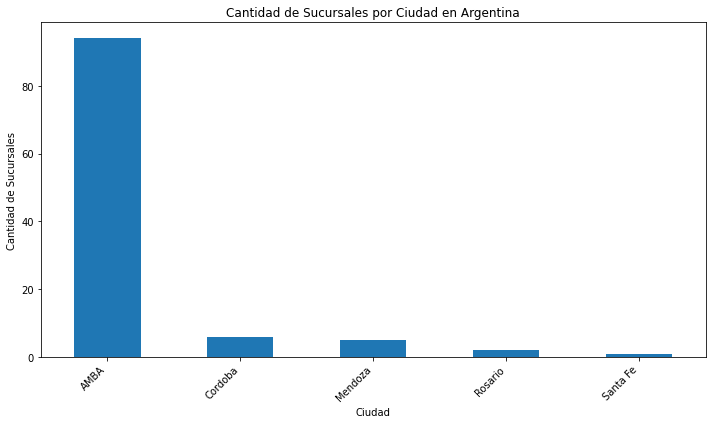

In [12]:


# Contar la cantidad de sucursales por ciudad
sucursales_por_ciudad = df_argentina['City'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sucursales_por_ciudad.plot(kind='bar')
plt.title('Cantidad de Sucursales por Ciudad en Argentina')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Sucursales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Estos datos revelan que el enfoque estratégico de la marca Starbucks parece estar firmemente dirigido hacia el Área Metropolitana de Buenos Aires (AMBA), lo que sugiere una clara preferencia por esta región debido a consideraciones económicas y de mercado

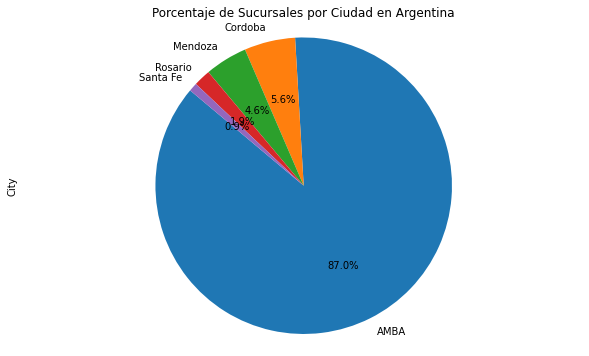

In [13]:

# Contar la cantidad de sucursales por ciudad
sucursales_por_ciudad = df_argentina['City'].value_counts()

# Crear una nueva figura con un fondo blanco
fig = plt.figure(figsize=(10, 6), facecolor='white')

# Crear un gráfico de torta con porcentajes
sucursales_por_ciudad.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Sucursales por Ciudad en Argentina')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar la figura
plt.show()

Se observa una concentración significativa de sucursales de Starbucks en el Área Metropolitana de Buenos Aires (AMBA), representando un impresionante 87% del total en Argentina, seguido de manera distante por Córdoba, con un 5.6%, Mendoza con un 4.6%, Rosario con un 1.9%, y Santa Fe con un 0.9%.

In [16]:

# Filtrar solo las filas correspondientes a Argentina
df_argentina = df[df['Country'] == 'AR']

# Crear el gráfico de dispersión en un mapa
fig = px.scatter_mapbox(df_argentina, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Store Name",
                        hover_data=["City", "Street Address"],
                        zoom=4, 
                        height=600,
                        size_max=20)  # Ajustar el tamaño máximo de los puntos aquí (por ejemplo, 10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Ubicación de locales de Starbucks en Argentina")
fig.show()


In [21]:

# Filtrar solo las filas correspondientes a Argentina
df_argentina = df[df['Country'] == 'AR']

# Crear el gráfico de dispersión en un mapa
fig = px.scatter_mapbox(df_argentina, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Store Name",
                        hover_data=["City", "Street Address"],
                        zoom=10, 
                        height=600,
                        size_max=20)  # Ajustar el tamaño máximo de los puntos aquí (por ejemplo, 10)

# Establecer el centro del mapa en una coordenada específica
fig.update_layout(mapbox_style="open-street-map", 
                  mapbox_center={"lat": -34.6037, "lon": -58.3816})  # Coordenadas de Buenos Aires

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Ubicación de locales de Starbucks en Argentina")
fig.show()





# Análisis sobre España

In [32]:

# Filtrar solo las filas correspondientes a España
df_españa = df[df['Country'] == 'ES']

# Mostrar todas las variantes de "City" en España
cities_in_españa = df_argentina['City'].unique()
print("Variantes de 'City' en España:")
for city in cities_in_españa:
    print(city)

Variantes de 'City' en España:
Madrid
Aldaia
Malaga
Malanga
Manises
Mijas Costa
Sevilla
Valencia
Bilbao
Loiu
A Coruna
A CORUNA
Alicante
Telde
Barcelona
Palm
Palma
Las Tablas - Madrid
MADRID
Majadahonda
San Sebastian de los Reyes
Torrelodones
Murcia
San Sebastian
Zargoza


In [33]:
# Definir un diccionario con las correcciones de nombres de ciudades
correcciones_ciudades = {
    'Aldaia': 'Madrid',
    'Malanga': 'Malaga',
    'Manises': 'Valencia',
    'Mijas Costa': 'Malaga',
    'Loiu': 'Bilbao',
    'A CORUNA': 'A Coruna',
    'Telde': 'Palma',
    'Palm': 'Palma',
    'Las Tablas - Madrid': 'Madrid',
    'MADRID': 'Madrid',
    'Majadahonda': 'Madrid',
    'San Sebastian de los Reyes': 'Madrid',
    'Zargoza': 'Zaragoza',
    'Torrelodones': 'Madrid'
}

# Aplicar las correcciones de nombres de ciudades
df_españa['City'] = df_españa['City'].replace(correcciones_ciudades)

# Verificar los cambios
print("Variantes de 'City' en España después de unificar los nombres:")
print(df_españa['City'].unique())


Variantes de 'City' en España después de unificar los nombres:
['Madrid' 'Malaga' 'Valencia' 'Sevilla' 'Bilbao' 'A Coruna' 'Alicante'
 'Palma' 'Barcelona' 'Murcia' 'San Sebastian' 'Zaragoza']


C:\Users\rodri\AppData\Local\Temp\ipykernel_25632\3459462698.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



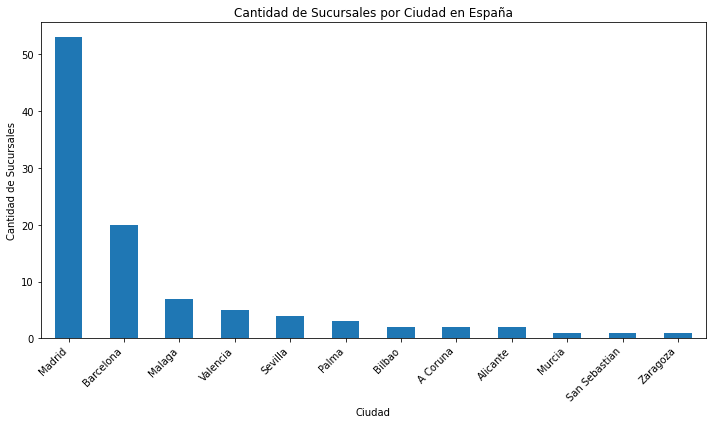

In [34]:
# Contar la cantidad de sucursales por ciudad en España
sucursales_por_ciudad_españa = df_españa['City'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sucursales_por_ciudad_españa.plot(kind='bar')
plt.title('Cantidad de Sucursales por Ciudad en España')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Sucursales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Se incluyen las áreas metropolitanas de 

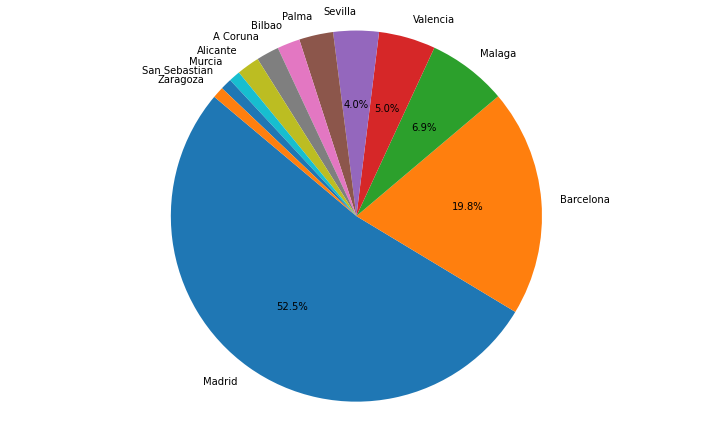

In [40]:
# Contar la cantidad de sucursales por ciudad en España
sucursales_por_ciudad_españa = df_españa['City'].value_counts()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(sucursales_por_ciudad_españa, labels=sucursales_por_ciudad_españa.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 3 else '', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [44]:

# Filtrar solo las filas correspondientes a España
df_argentina = df[df['Country'] == 'ES']

# Crear el gráfico de dispersión en un mapa
fig = px.scatter_mapbox(df_argentina, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Store Name",
                        hover_data=["City", "Street Address"],
                        zoom=4, 
                        height=600,
                        size_max=20)  # Ajustar el tamaño máximo de los puntos aquí (por ejemplo, 10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Ubicación de locales de Starbucks en España")
fig.show()


In [51]:
# Filtrar solo las filas correspondientes a España
df_espana = df[df['Country'] == 'ES']

# Crear el gráfico de dispersión en un mapa
fig = px.scatter_mapbox(df_espana, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Store Name",
                        hover_data=["City", "Street Address"],
                        zoom=4, 
                        height=600,
                        size_max=1)  # Ajustar el tamaño máximo de los puntos aquí (por ejemplo, 10)

# Definir el centro y el zoom para enfocarse en Madrid
center_lat = 40.4168
center_lon = -3.7038
zoom_level = 10

# Actualizar el estilo del mapa y el título
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": center_lat, "lon": center_lon},
                  mapbox_zoom=zoom_level,
                  title="Ubicación de locales de Starbucks en España centrada en Madrid")

# Mostrar el gráfico
fig.show()


In [52]:

# Crear el gráfico de dispersión en un mapa a nivel mundial
fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Store Name",
                        hover_data=["City", "Street Address", "Country"],
                        zoom=1,  # Ajusta el zoom para mostrar todo el mundo
                        height=600,
                        size_max=20)  # Ajusta el tamaño máximo de los puntos aquí (por ejemplo, 10)

# Actualizar el estilo del mapa y el título
fig.update_layout(mapbox_style="open-street-map",
                  title="Ubicación de todas las sucursales de Starbucks a nivel mundial")

# Mostrar el gráfico
fig.show()
